In [10]:
import os
import numpy as np
from functools import partial
import math
from tqdm import tqdm
import time as time

import torch
M1 = False

if M1:
    device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
else:
    os.environ["CUDA_VISIBLE_DEVICES"]="1"
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    if torch.cuda.is_available():
        print(torch.cuda.is_available())
        print(torch.cuda.device_count())
        print(torch.cuda.current_device())
        print(torch.cuda.get_device_name(torch.cuda.current_device()))




from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from torchmetrics.functional import structural_similarity_index_measure 
from torchmetrics.functional import peak_signal_noise_ratio 

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.io as sio
from astropy.io import fits

import large_scale_UQ as luq
from convex_reg import utils as utils_cvx_reg

cmap = 'cubehelix'

True
1
0
NVIDIA A100-PCIE-40GB


In [1]:
options = {"tol": 1e-5, "iter": 5000, "update_iter": 50, "record_iters": False}

In [2]:
vars_dir_path = '/disk/xray0/tl3/repos/large-scale-UQ/debug/sampling-outputs'
vars_path = '/ULA_CRR_frac_delta_5.0e-01_lmbd_1.0e+05_mu_2.0e+01_nsamples_4.0e+03_thinning_5.0e+02_frac_burn_2.0e-01_vars.npy'

vars = np.load(vars_dir_path+vars_path, allow_pickle=True)[()]


In [3]:
vars.keys()

dict_keys(['X_ground_truth', 'X_dirty', 'X_MAP', 'X_MMSE', 'post_meanvar', 'absfouriercoeff', 'MC_X', 'logpi_thinning_trace', 'X', 'quantiles', 'st_dev_down', 'means_list', 'params', 'elapsed_time'])

In [4]:
vars['MC_X'].shape

(4000, 256, 256)

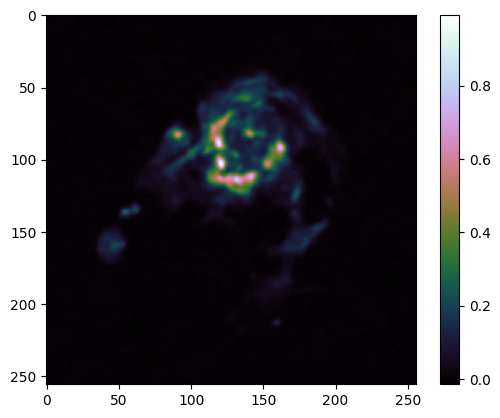

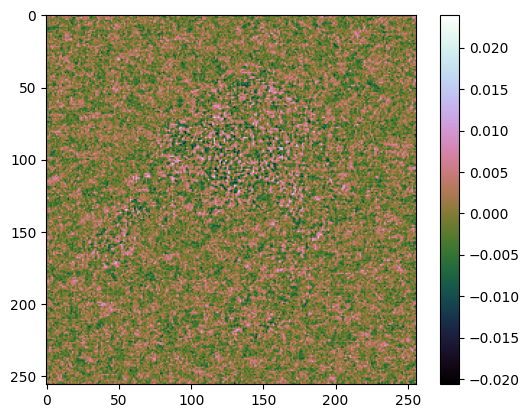

In [9]:
plt.figure()
plt.imshow(vars['MC_X'][12,:,:], cmap=cmap)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(vars['MC_X'][10,:,:]-vars['MC_X'][12,:,:], cmap=cmap)
plt.colorbar()
plt.show()

In [17]:
# Compute the UQ plots
superpix_sizes = [32,16,8,4,1]
alpha_prob = 0.2

quantiles, st_dev_down, means_list = luq.map_uncertainty.compute_UQ(np.copy(vars['MC_X']), superpix_sizes=superpix_sizes, alpha=alpha_prob)



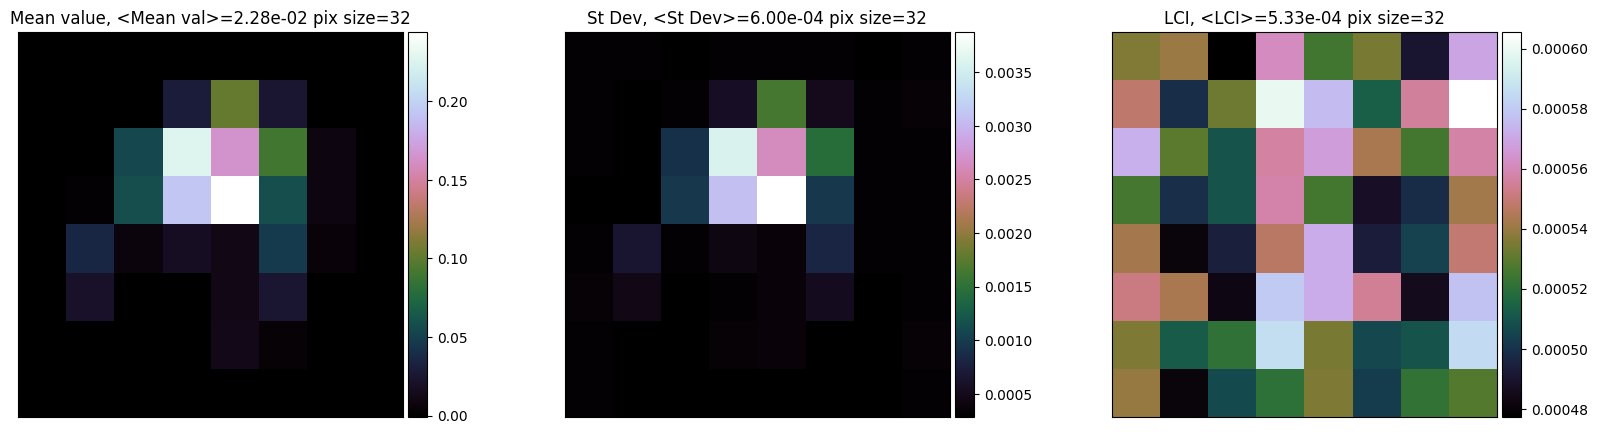

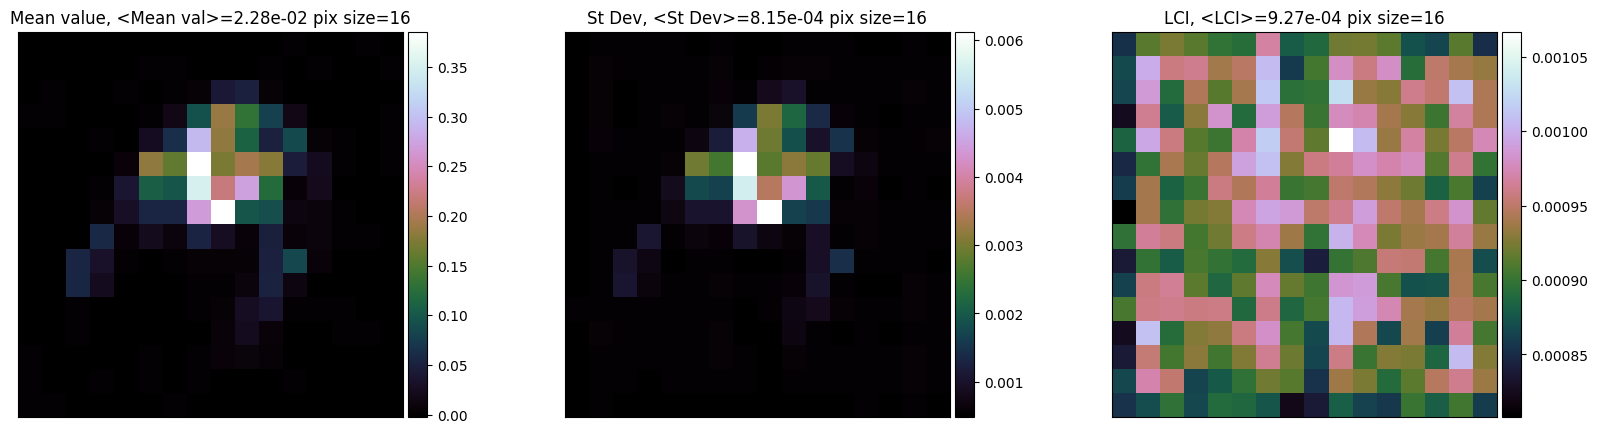

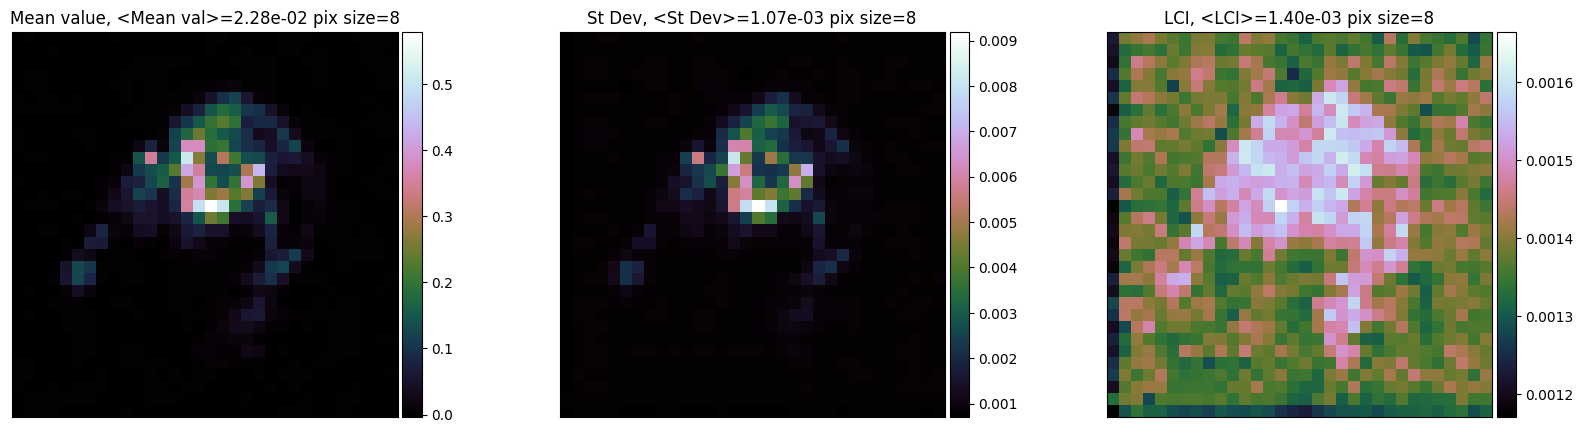

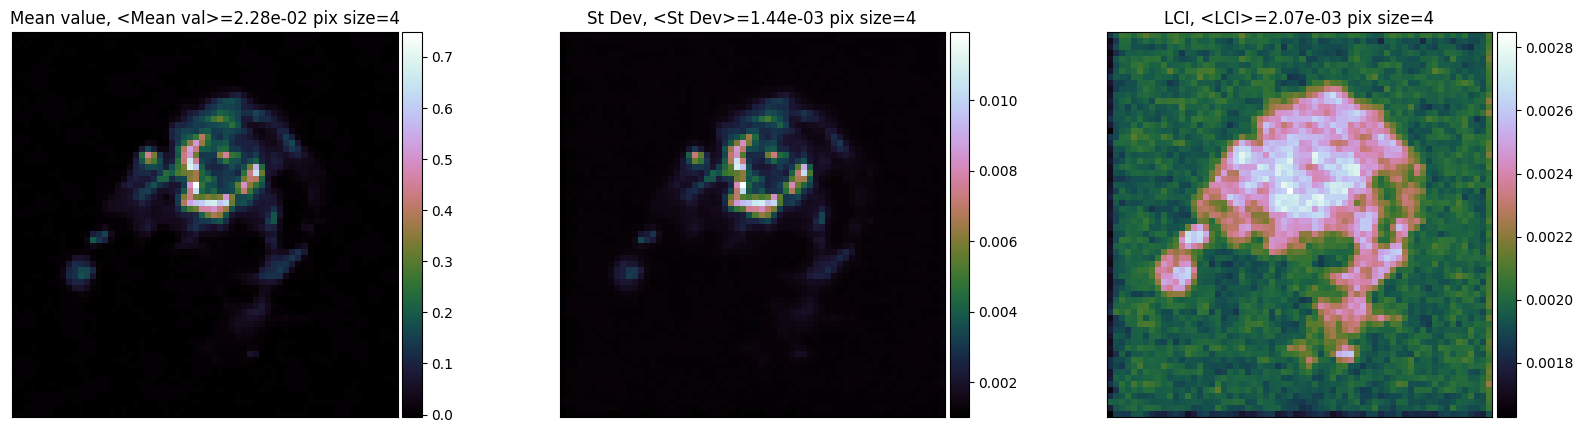

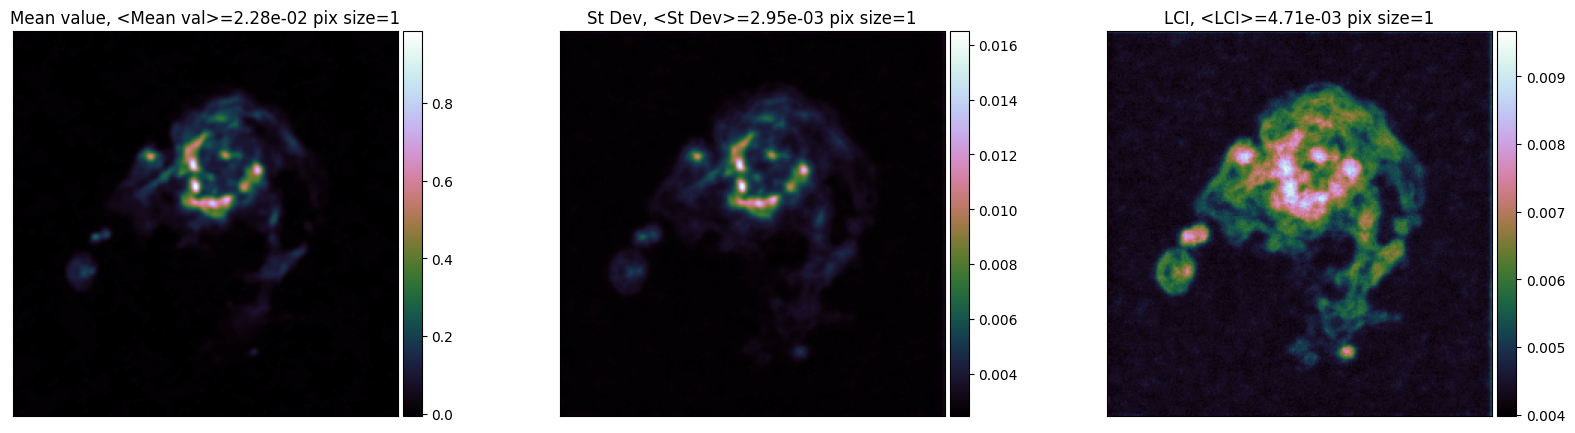

In [18]:
for it_3, pix_size in enumerate(superpix_sizes):
    # Plot UQ
    fig = plt.figure(figsize=(20,5))

    plt.subplot(131)
    ax = plt.gca()
    ax.set_title(f'Mean value, <Mean val>={np.mean(means_list[it_3]):.2e} pix size={pix_size:d}')
    im = ax.imshow(means_list[it_3], cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_yticks([]);ax.set_xticks([])

    plt.subplot(132)
    ax = plt.gca()
    ax.set_title(f'St Dev, <St Dev>={np.mean(st_dev_down[it_3]):.2e} pix size={pix_size:d}')
    im = ax.imshow(st_dev_down[it_3], cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_yticks([]);ax.set_xticks([])

    plt.subplot(133)
    LCI = quantiles[it_3][1,:,:] - quantiles[it_3][0,:,:]
    ax = plt.gca()
    ax.set_title(f'LCI, <LCI>={np.mean(LCI):.2e} pix size={pix_size:d}')
    im = ax.imshow(LCI, cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_yticks([]);ax.set_xticks([])
    # plt.savefig(savefig_dir+save_prefix+'_UQ_pixel_size_{:d}.pdf'.format(pix_size))
    # plt.close()
    plt.show()


In [20]:
vars_2_dir_path = '/disk/xray0/tl3/repos/large-scale-UQ/debug/sampling-outputs'
vars_2_path = '/ULA_CRR_frac_delta_5.0e-01_lmbd_5.0e+04_mu_2.0e+01_nsamples_1.0e+03_thinning_1.0e+03_frac_burn_2.0e-01_vars.npy'

vars_2 = np.load(vars_2_dir_path+vars_2_path, allow_pickle=True)[()]


In [21]:
# Compute the UQ plots
superpix_sizes = [32,16,8,4,1]
alpha_prob = 0.2

quantiles_2, st_dev_down_2, means_list_2 = luq.map_uncertainty.compute_UQ(np.copy(vars_2['MC_X']), superpix_sizes=superpix_sizes, alpha=alpha_prob)


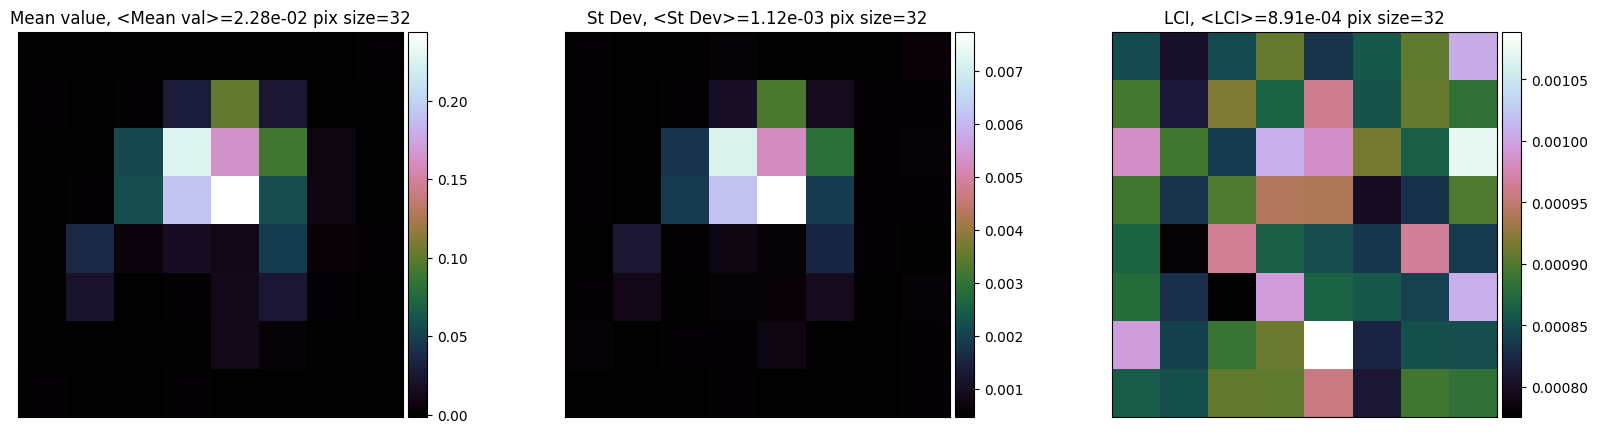

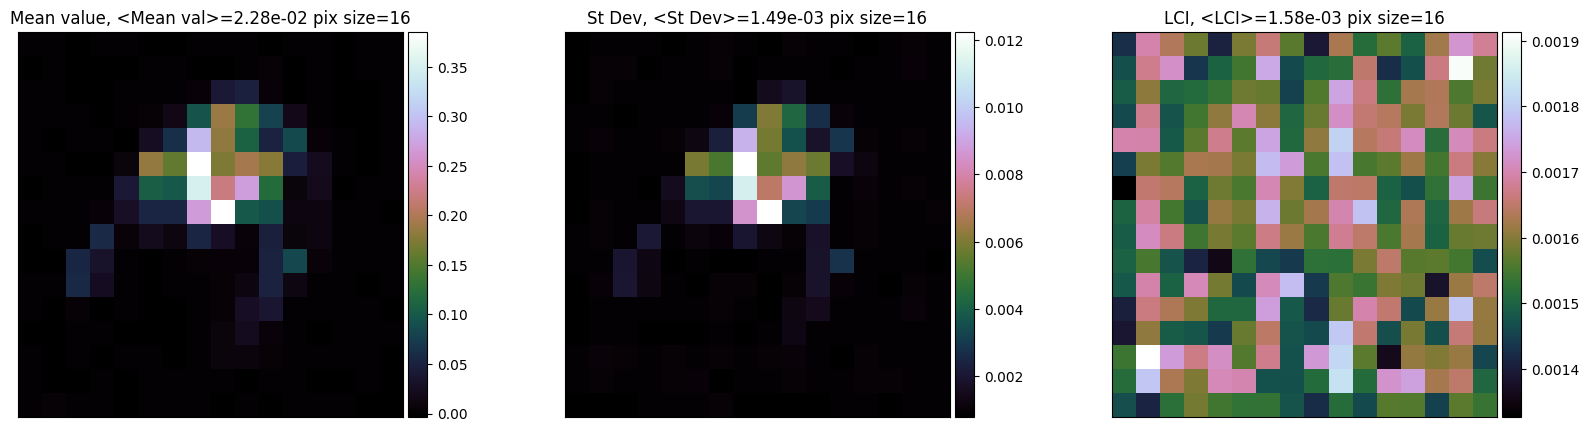

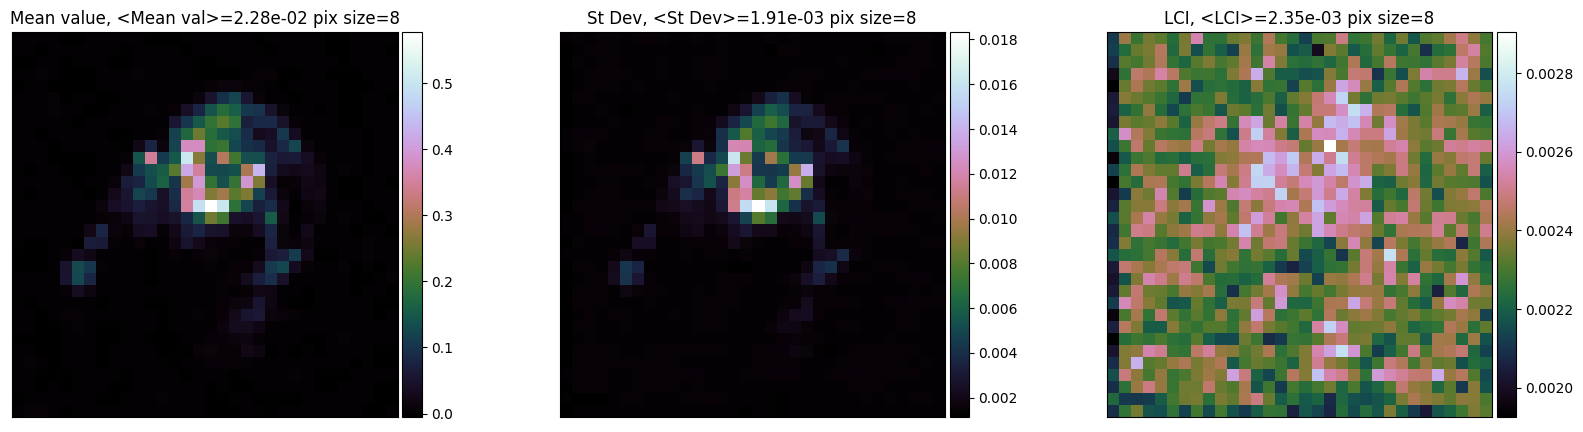

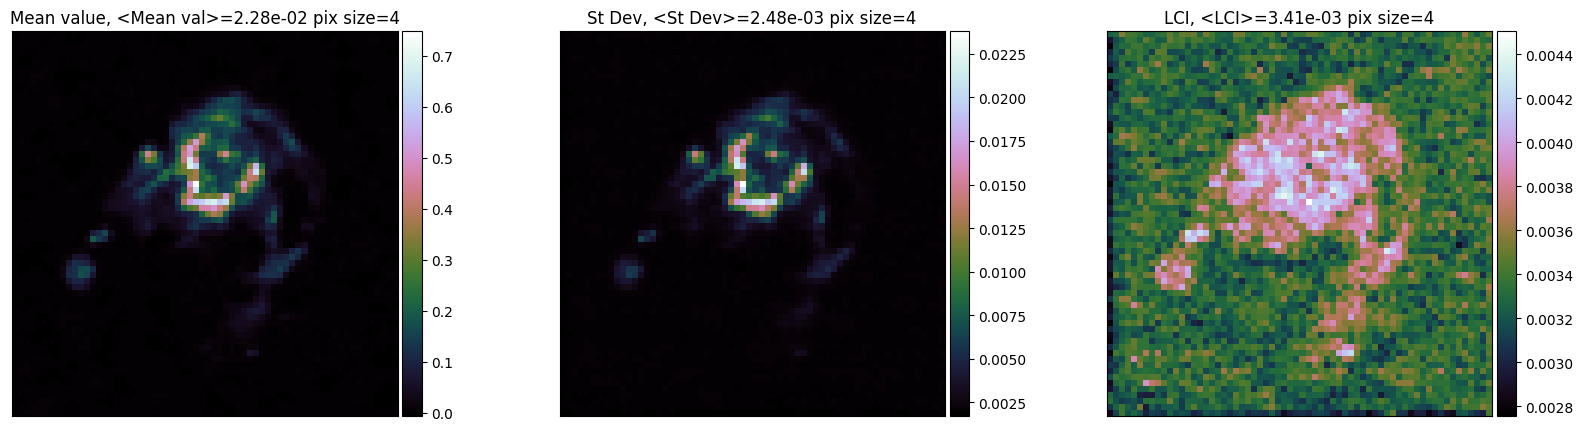

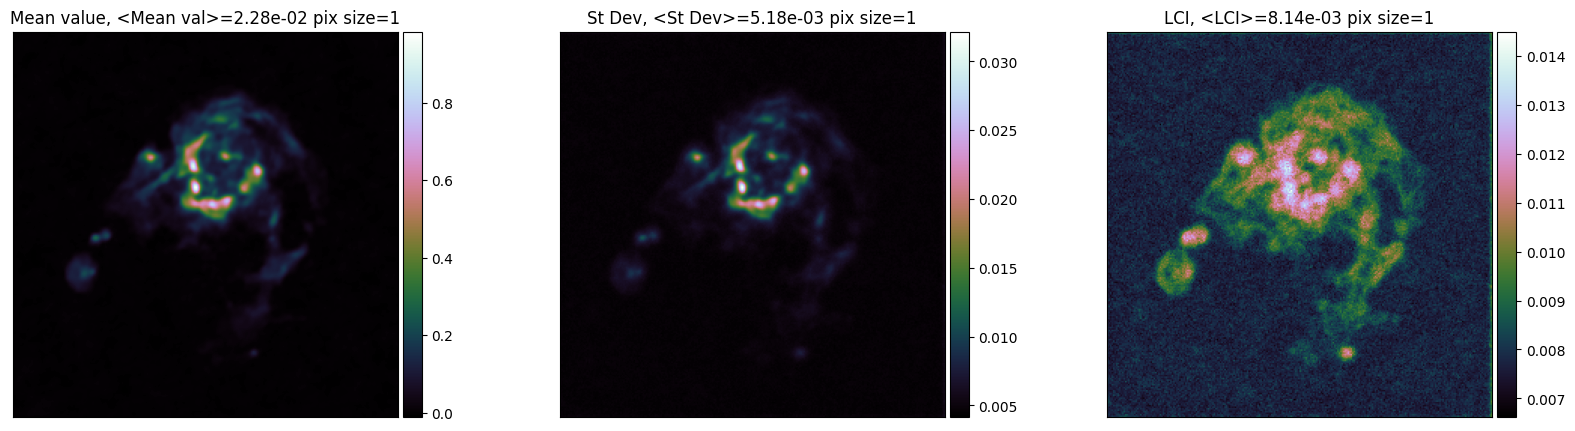

In [22]:
for it_3, pix_size in enumerate(superpix_sizes):
    # Plot UQ
    fig = plt.figure(figsize=(20,5))

    plt.subplot(131)
    ax = plt.gca()
    ax.set_title(f'Mean value, <Mean val>={np.mean(means_list_2[it_3]):.2e} pix size={pix_size:d}')
    im = ax.imshow(means_list_2[it_3], cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_yticks([]);ax.set_xticks([])

    plt.subplot(132)
    ax = plt.gca()
    ax.set_title(f'St Dev, <St Dev>={np.mean(st_dev_down_2[it_3]):.2e} pix size={pix_size:d}')
    im = ax.imshow(st_dev_down_2[it_3], cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_yticks([]);ax.set_xticks([])

    plt.subplot(133)
    LCI = quantiles_2[it_3][1,:,:] - quantiles_2[it_3][0,:,:]
    ax = plt.gca()
    ax.set_title(f'LCI, <LCI>={np.mean(LCI):.2e} pix size={pix_size:d}')
    im = ax.imshow(LCI, cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_yticks([]);ax.set_xticks([])
    # plt.savefig(savefig_dir+save_prefix+'_UQ_pixel_size_{:d}.pdf'.format(pix_size))
    # plt.close()
    plt.show()
